# Estudio de la tabla Summary

In [1]:
# Toma la tabla summary de SQL y procesa rendimientos

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Define el directorio y el nombre del archivo
directory = 'hist_input/'
filename = 'summary_en_bruto.csv'

# Construye la ruta completa al archivo
file_path = directory + filename
pd.set_option('display.float_format', lambda x: '%.1f' % x)


In [3]:
df = pd.read_csv(file_path, encoding='utf-8')
df['First_Timestamp'] = pd.to_datetime(df['First_Timestamp'])
df['Last_Timestamp'] = pd.to_datetime(df['Last_Timestamp'])
df = df.rename(columns={'First_BUY ETH': 'First_BUY_ETH'})
# Profits and ratios
df['Profit'] = df['Last_SELL_ETH'] - df['First_BUY_ETH']
df['Return_Perc'] = (df['Profit'] * 100) / df['First_BUY_ETH']
df['timer_m'] = (df['Last_Timestamp'] - df['First_Timestamp']).dt.total_seconds() / 60

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Pair_Address     1316 non-null   object             
 1   BUY_ETH          1316 non-null   float64            
 2   SELL_ETH         1316 non-null   float64            
 3   BUY_Count        1316 non-null   int64              
 4   SELL_Count       1316 non-null   int64              
 5   First_BUY_ETH    1316 non-null   int64              
 6   Last_SELL_ETH    1316 non-null   float64            
 7   First_Timestamp  1316 non-null   datetime64[ns, UTC]
 8   Last_Timestamp   1316 non-null   datetime64[ns, UTC]
 9   Profit           1316 non-null   float64            
 10  Return_Perc      1316 non-null   float64            
 11  timer_m          1316 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(6), int64(3), object(1)
memory usage: 123

In [4]:
df

,Pair_Address,BUY_ETH,SELL_ETH,BUY_Count,SELL_Count,First_BUY_ETH,Last_SELL_ETH,First_Timestamp,Last_Timestamp,Profit,Return_Perc,timer_m
0,0x0009d8efc3e90d69f492e80e6ed63a8983c39336,21.6,21.6,71,19,13,19.1,2024-03-29 05:22:23+00:00,2024-03-29 06:22:45+00:00,6.1,46.6,60.4
1,0x008a6a6a4c08420238fecb51e851499502e779bc,26.6,26.6,69,16,15,23.4,2024-03-30 22:24:35+00:00,2024-03-30 23:24:55+00:00,8.4,56.1,60.3
2,0x00ae78212cdce6d6aaa2957017cd2b923f8b6169,20.9,20.9,64,16,11,18.4,2024-03-31 10:05:51+00:00,2024-03-31 11:06:17+00:00,7.4,67.0,60.4
3,0x00b7c86c5227828eaed55edc7fc06b203fd20ffd,17.1,17.1,64,1,12,17.1,2024-03-29 20:17:49+00:00,2024-03-29 20:42:01+00:00,5.1,42.6,24.2
4,0x013545fd865874f4700539fb03477572ff0c5622,36.4,36.4,74,19,20,32.1,2024-03-27 07:42:05+00:00,2024-03-27 08:42:21+00:00,12.1,60.4,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0xff2b334e739da4a5c62c1110ec1ba4c47720357c,204.9,204.9,506,212,10,41.3,2024-04-01 14:46:13+00:00,2024-04-01 22:55:47+00:00,31.3,313.1,489.6
1312,0xff2eeefec6923640155d955614d6d7b96437f85e,35.9,35.9,65,18,19,31.4,2024-04-01 13:24:15+00:00,2024-04-01 14:24:35+00:00,12.4,65.1,60.3
1313,0xff2f1d54a601e2ff33a3ac4e49010264b3ee388d,39.2,39.2,66,18,21,33.9,2024-04-03 09:33:25+00:00,2024-04-03 10:33:47+00:00,12.9,61.5,60.4
1314,0xffa53e78282c1f2d5bfb9a70795d3f35828352f9,26.2,26.2,90,56,10,16.5,2024-04-04 07:31:23+00:00,2024-04-04 08:50:11+00:00,6.5,64.7,78.8


In [5]:
df_AGR = df[['Pair_Address', 'First_BUY_ETH', 'Last_SELL_ETH', 'Profit', 'Return_Perc', 'First_Timestamp', 'timer_m']]
df_AGR = df_AGR.sort_values(by='Return_Perc', ascending=False)
df_AGR

,Pair_Address,First_BUY_ETH,Last_SELL_ETH,Profit,Return_Perc,First_Timestamp,timer_m
340,0x46198ee719c115bfefea9d96b1eddbda3a236006,15,154.9,139.9,932.4,2024-04-02 02:46:15+00:00,977.4
745,0x8f1bfd0a460cbf3c3a3da73859ea326dbfea6474,15,143.4,128.4,855.9,2024-04-04 13:35:33+00:00,2196.4
531,0x6604f5176a649d9bb24ab70942276d0f6560fdfe,10,88.2,78.2,781.5,2024-04-01 10:27:23+00:00,2444.0
1066,0xd007f6f3fb4285c44390d86f6da46c73f12d6212,10,85.9,75.9,759.2,2024-03-31 02:29:13+00:00,336.9
214,0x2c952cc622141bcd6cce77ac20a796987e788ee4,10,85.7,75.7,757.1,2024-03-27 16:55:59+00:00,2567.7
...,...,...,...,...,...,...,...
581,0x6eec59cacda201fe3722d9dba3c2257b7fb47e49,10,0.0,-10.0,-100.0,2024-04-04 22:05:19+00:00,51.9
1040,0xca18e5ba9628e4e201bbfabf3eedf840b14f3928,10,0.0,-10.0,-100.0,2024-04-04 15:30:41+00:00,13.3
1034,0xc8e63edbcf2b67bddbf4dddafba6808822865970,10,0.0,-10.0,-100.0,2024-04-01 08:05:21+00:00,3.6
1214,0xec66d311ae408669da0737a794ea267c6b78f484,13,0.0,-13.0,-100.0,2024-03-31 11:14:05+00:00,64.2


# Procesado de Datos

In [6]:
df_AGR.describe()

,First_BUY_ETH,Last_SELL_ETH,Profit,Return_Perc,timer_m
count,1316.0,1316.0,1316.0,1316.0,1316.0
mean,16.1,27.5,11.4,75.1,356.7
std,7.2,17.5,14.6,105.4,1302.4
min,10.0,0.0,-60.0,-100.0,0.6
25%,10.0,16.4,5.6,47.2,60.2
50%,15.0,23.5,8.6,59.0,60.5
75%,20.0,34.4,13.9,70.0,98.2
max,100.0,154.9,139.9,932.4,17328.7


In [7]:
import pandas as pd

# Asumiendo que df_AGR es tu DataFrame

# Definimos los límites de los segmentos para 'First_BUY_ETH'
bins = [3, 10, 15, 20, 30, float('inf')]
labels = ['3-10', '10-15', '15-20', '20-30', '>30']

# Segmentamos 'First_BUY_ETH' en los rangos definidos
df_AGR['Segmento_First_BUY_ETH'] = pd.cut(df_AGR['First_BUY_ETH'], bins=bins, labels=labels, right=False)

# Agrupamos por el nuevo segmento
# Calculamos las estadísticas solicitadas para 'Return_Perc' y la media para 'timer_m'
resultados = df_AGR.groupby('Segmento_First_BUY_ETH').agg({
    'Return_Perc': ['mean', 'max', 'count'],
    'timer_m': ['mean']
})

# Renombramos las columnas para mejor claridad
resultados.columns = ['_'.join(col).strip() for col in resultados.columns.values]

# Mostramos los resultados
print(resultados)

                        Return_Perc_mean  Return_Perc_max  Return_Perc_count  \
Segmento_First_BUY_ETH                                                         
3-10                                 NaN              NaN                  0   
10-15                               83.6            781.5                651   
15-20                               68.7            932.4                269   
20-30                               65.8            377.5                280   
>30                                 64.8            183.7                116   

                        timer_m_mean  
Segmento_First_BUY_ETH                
3-10                             NaN  
10-15                          402.2  
15-20                          214.5  
20-30                          304.8  
>30                            556.5  


Pearson correlation coefficient without outliers: 0.15027391866481027


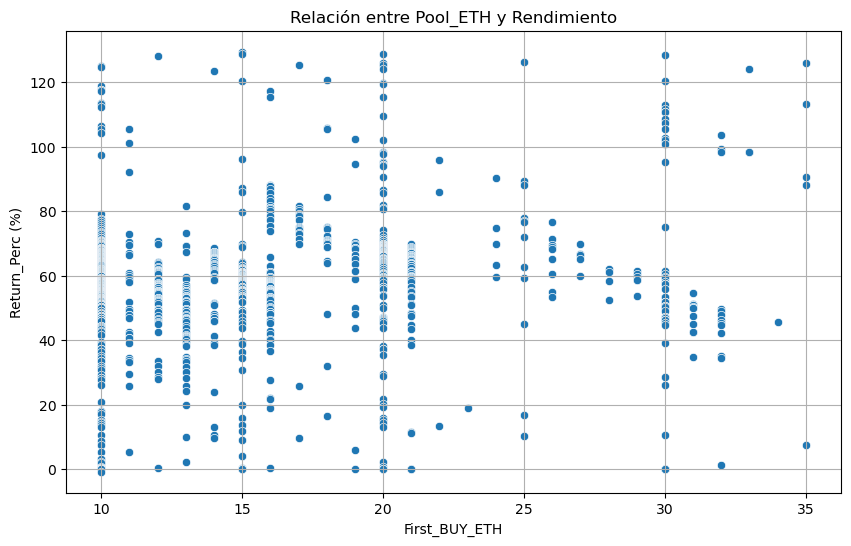

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_AGR is your DataFrame

# Calculate IQR for 'First_BUY_ETH'
Q1_eth = df_AGR['First_BUY_ETH'].quantile(0.20)
Q3_eth = df_AGR['First_BUY_ETH'].quantile(0.80)
IQR_eth = Q3_eth - Q1_eth

# Define bounds for outliers in 'First_BUY_ETH'
lower_bound_eth = Q1_eth - 1.5 * IQR_eth
upper_bound_eth = Q3_eth + 1.5 * IQR_eth

# Filter out outliers based on 'First_BUY_ETH'
df_filtered = df_AGR[(df_AGR['First_BUY_ETH'] >= lower_bound_eth) & (df_AGR['First_BUY_ETH'] <= upper_bound_eth)]

# Optionally repeat the process for 'Return_Perc'
Q1_rp = df_filtered['Return_Perc'].quantile(0.20)
Q3_rp = df_filtered['Return_Perc'].quantile(0.80)
IQR_rp = Q3_rp - Q1_rp

lower_bound_rp = Q1_rp - 1.5 * IQR_rp
upper_bound_rp = Q3_rp + 1.5 * IQR_rp

df_filtered = df_filtered[(df_filtered['Return_Perc'] >= lower_bound_rp) & (df_filtered['Return_Perc'] <= upper_bound_rp)]

# Recalculate the Pearson correlation coefficient without the outliers
correlation_filtered = df_filtered['First_BUY_ETH'].corr(df_filtered['Return_Perc'])
print(f'Pearson correlation coefficient without outliers: {correlation_filtered}')

# Scatter plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='First_BUY_ETH', y='Return_Perc')
plt.title('Relación entre Pool_ETH y Rendimiento')
plt.xlabel('First_BUY_ETH')
plt.ylabel('Return_Perc (%)')
plt.grid(True)
plt.show()


Pearson correlation coefficient between Return_Perc and timer_m without outliers: 0.19903976141988072


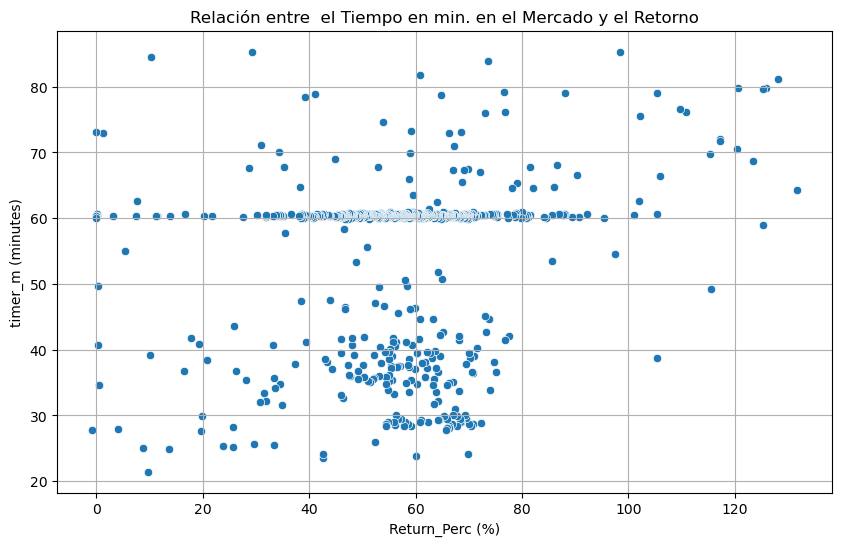

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_AGR is your DataFrame

# Calculate IQR for 'Return_Perc'
Q1_rp = df_AGR['Return_Perc'].quantile(0.20)
Q3_rp = df_AGR['Return_Perc'].quantile(0.80)
IQR_rp = Q3_rp - Q1_rp

# Define bounds for outliers in 'Return_Perc'
lower_bound_rp = Q1_rp - 1.5 * IQR_rp
upper_bound_rp = Q3_rp + 1.5 * IQR_rp

# Filter out outliers based on 'Return_Perc'
df_filtered = df_AGR[(df_AGR['Return_Perc'] >= lower_bound_rp) & (df_AGR['Return_Perc'] <= upper_bound_rp)]

# Optionally repeat the process for 'timer_m'
Q1_tm = df_filtered['timer_m'].quantile(0.20)
Q3_tm = df_filtered['timer_m'].quantile(0.80)
IQR_tm = Q3_tm - Q1_tm

lower_bound_tm = Q1_tm - 1.5 * IQR_tm
upper_bound_tm = Q3_tm + 1.5 * IQR_tm

df_filtered = df_filtered[(df_filtered['timer_m'] >= lower_bound_tm) & (df_filtered['timer_m'] <= upper_bound_tm)]

# Recalculate the Pearson correlation coefficient without the outliers
correlation_filtered = df_filtered['Return_Perc'].corr(df_filtered['timer_m'])
print(f'Pearson correlation coefficient between Return_Perc and timer_m without outliers: {correlation_filtered}')

# Scatter plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Return_Perc', y='timer_m')
plt.title('Relación entre  el Tiempo en min. en el Mercado y el Retorno')
plt.xlabel('Return_Perc (%)')
plt.ylabel('timer_m (minutes)')
plt.grid(True)
plt.show()


Pearson correlation coefficient between First_BUY_ETH and timer_m without outliers: 0.06274323823039951


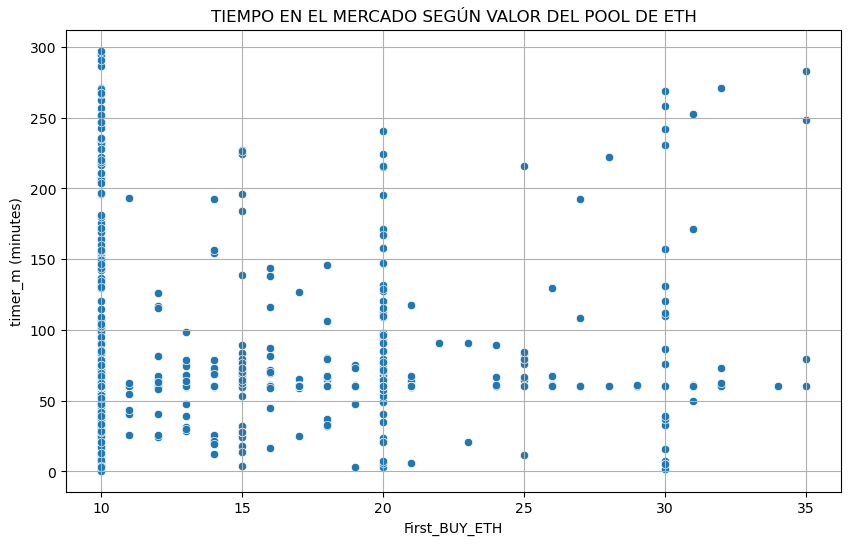

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_AGR is your DataFrame

# Calculate IQR for 'First_BUY_ETH'
Q1_eth = df_AGR['First_BUY_ETH'].quantile(0.20)
Q3_eth = df_AGR['First_BUY_ETH'].quantile(0.80)
IQR_eth = Q3_eth - Q1_eth

# Define bounds for outliers in 'First_BUY_ETH'
lower_bound_eth = Q1_eth - 1.5 * IQR_eth
upper_bound_eth = Q3_eth + 1.5 * IQR_eth

# Filter out outliers based on 'First_BUY_ETH'
df_filtered = df_AGR[(df_AGR['First_BUY_ETH'] >= lower_bound_eth) & (df_AGR['First_BUY_ETH'] <= upper_bound_eth)]

# Optionally repeat the process for 'timer_m'
Q1_tm = df_filtered['timer_m'].quantile(0.20)
Q3_tm = df_filtered['timer_m'].quantile(0.80)
IQR_tm = Q3_tm - Q1_tm

lower_bound_tm = Q1_tm - 1.5 * IQR_tm
upper_bound_tm = Q3_tm + 1.5 * IQR_tm

df_filtered = df_filtered[(df_filtered['timer_m'] >= lower_bound_tm) & (df_filtered['timer_m'] <= upper_bound_tm)]

# Recalculate the Pearson correlation coefficient without the outliers
correlation_filtered = df_filtered['First_BUY_ETH'].corr(df_filtered['timer_m'])
print(f'Pearson correlation coefficient between First_BUY_ETH and timer_m without outliers: {correlation_filtered}')

# Scatter plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='First_BUY_ETH', y='timer_m')
plt.title('TIEMPO EN EL MERCADO SEGÚN VALOR DEL POOL DE ETH')
plt.xlabel('First_BUY_ETH')
plt.ylabel('timer_m (minutes)')
plt.grid(True)
plt.show()

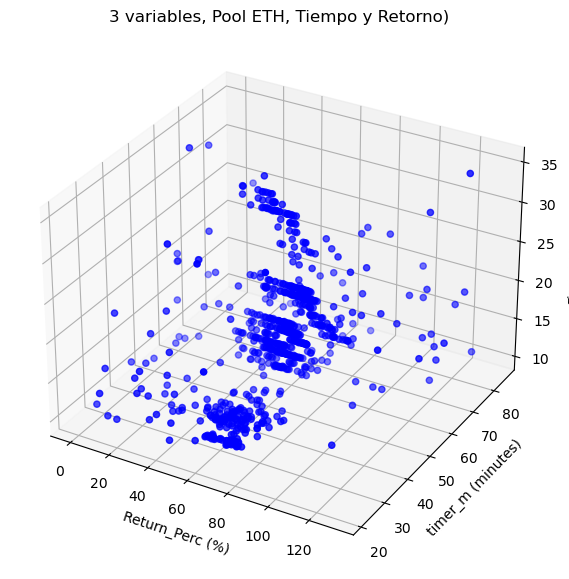

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_AGR is your DataFrame

# Function to remove outliers based on the IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.20)
    Q3 = df[column_name].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Removing outliers for 'Return_Perc', 'timer_m', and 'First_BUY_ETH'
df_clean = remove_outliers(df_AGR, 'Return_Perc')
df_clean = remove_outliers(df_clean, 'timer_m')
df_clean = remove_outliers(df_clean, 'First_BUY_ETH')

# Setting up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extracting data for the plot
x = df_clean['Return_Perc']
y = df_clean['timer_m']
z = df_clean['First_BUY_ETH']

# Plotting
ax.scatter(x, y, z, c='blue', marker='o')

# Adding labels
ax.set_xlabel('Return_Perc (%)')
ax.set_ylabel('timer_m (minutes)')
ax.set_zlabel('First_BUY_ETH')

# Title
ax.set_title('3 variables, Pool ETH, Tiempo y Retorno)')

# Show plot
plt.show()

# Grabación del fichero csv limpio

In [12]:
# Grabación del fichero total de tokens creado en los últimos tres meses
file_path = 'hist_output/summary_AGR_clean.csv'

# Writing the DataFrame to a CSV file without the index column
df_AGR.to_csv(file_path, index=False)

print("DataFrame summary_AGR_clean has been written to CSV successfully.")

DataFrame summary_AGR_clean has been written to CSV successfully.
